In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
df = pd.read_csv("../dataset/train.csv")

#Data Overview
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:

#Checking Missing Values
missing_values = df.isnull().sum()
print(missing_values)

#Handling Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True) 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  
df.drop(columns=['Cabin'], inplace=True) #Too many missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/var/folders/gg/9zqh0nqn735b1fk8nmmts9400000gn/T/ipykernel_88343/3975461518.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing ages with median
/var/folders/gg/9zqh0nqn735b1fk8nmmts9400000gn/T/ipykernel_88343/3975461518.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

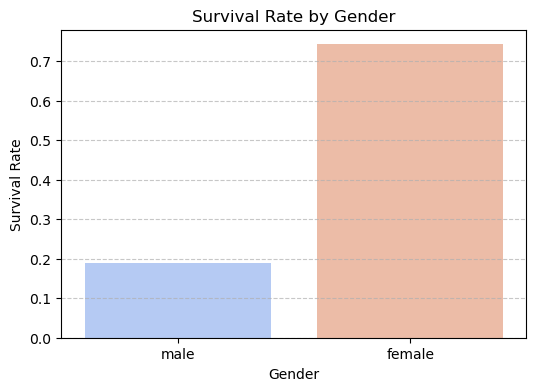

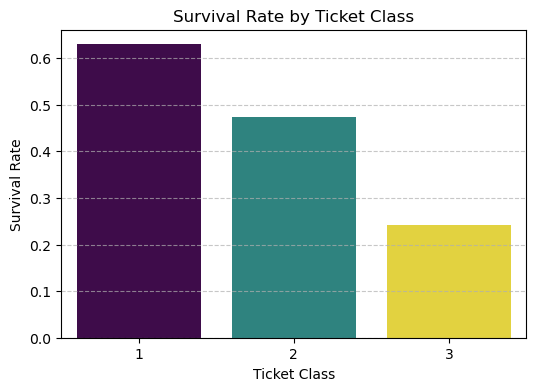

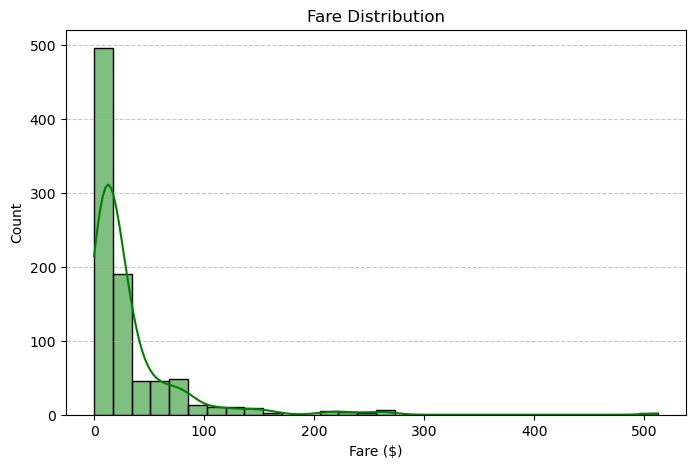

In [8]:
# Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None, hue='Sex', palette='coolwarm', legend=False)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("survival_rate_gender.png")
plt.show()

# Survival Rate by Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None, hue='Pclass', palette='viridis', legend=False)
plt.title("Survival Rate by Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Survival Rate")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("survival_rate_class.png")
plt.show()

# Fare Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title("Fare Distribution")
plt.xlabel("Fare ($)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("fare_distribution.png")
plt.show()